In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [47]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCH = 10

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage", 
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [12]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [21]:
for img, label in dataset.take(1):
    print(img.shape, label.shape)


(32, 256, 256, 3) (32,)


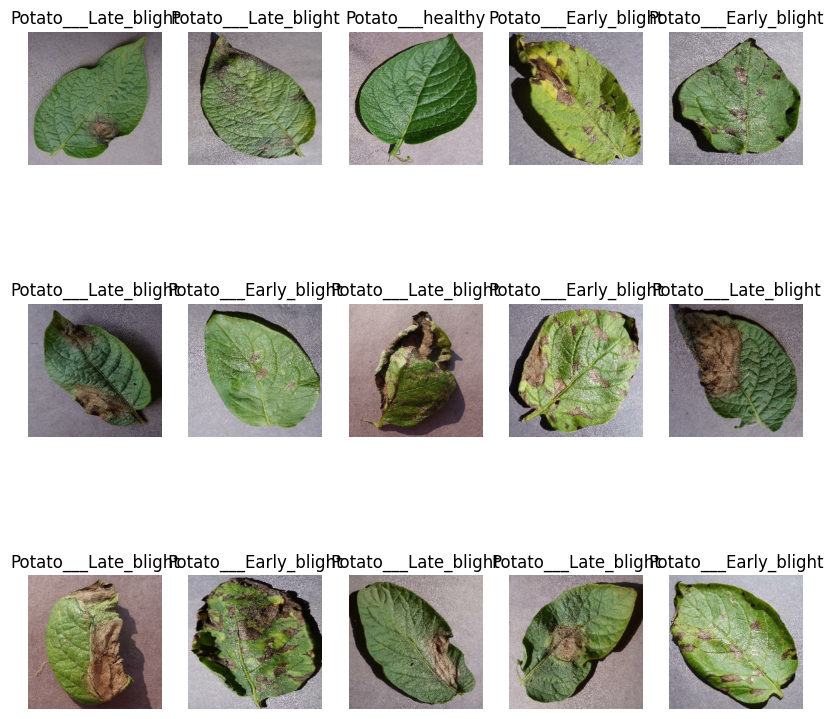

In [38]:
plt.figure(figsize=(10, 10))
for img, label in dataset.take(1):
    for i in range(15):
        plt.subplot(3, 5, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis("off")



In [34]:
def dataset_partition(ds, train_split=0.8, validatio_split=0.1, test_split=0.1, shuffle=True):
    if shuffle:
        ds.shuffle(1000, seed=12) #first argument is shuffle size
    train_ds = ds.take(int(len(ds)*train_split)) 
    val_ds = ds.skip(int(len(ds)*train_split)).take(int(len(ds)*validatio_split))
    test_ds = ds.skip(int(len(ds)*train_split)).skip(int(len(ds)*validatio_split))

    return train_ds, val_ds, test_ds

In [35]:
train_ds, val_ds, test_ds = dataset_partition(dataset)

In [36]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


In [ ]:
#prefetching of the data will improve the model training performence
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:

scal_and_aug = tf.keras.Sequential([
    
    tf.keras.layers.RandomFlip(),
    tf.keras.layers.RandomRotation(0.2)

])

In [46]:
prepros_train_ds = train_ds.map(lambda x, y: (scal_and_aug(x), y))
img, lab = next(iter(prepros_train_ds))
print(img.shape, lab.shape, len(prepros_train_ds))

(32, 256, 256, 3) (32,) 54


In [69]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 3

model = tf.keras.Sequential([

  tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')

])

model.build(input_shape=input_shape)

In [70]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_7 (Resizing)           │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 128)              │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 3)                │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,387 (782.76 KB)

 Trainable params: 200,387 (782.76 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy']
  )


In [ ]:
history = model.fit(
  prepros_train_ds,
  validation_data=val_ds,
  verbose=1,
  epochs=5
)


Epoch 1/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 282s 5s/step - accuracy: 0.4211 - loss: 0.9969 - val_accuracy: 0.4792 - val_loss: 2.0686
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 265s 5s/step - accuracy: 0.4376 - loss: 0.9189 - val_accuracy: 0.4583 - val_loss: 1.8650
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 259s 5s/step - accuracy: 0.4724 - loss: 0.9171 - val_accuracy: 0.6042 - val_loss: 1.8496
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 278s 5s/step - accuracy: 0.4721 - loss: 0.9169 - val_accuracy: 0.6927 - val_loss: 1.8322
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 310s 6s/step - accuracy: 0.4735 - loss: 0.9168 - val_accuracy: 0.6823 - val_loss: 1.8145


In [73]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.6353 - loss: 1.5598
